In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_no = pd.read_csv(
    '/content/gdrive/MyDrive/Colab Notebooks/ecg/ptbdb_normal.csv')
data_ab = pd.read_csv(
    '/content/gdrive/MyDrive/Colab Notebooks/ecg/ptbdb_abnormal.csv')
data_no = np.array(data_no)
data_ab = np.array(data_ab)

In [5]:
data_no.shape

(4045, 188)

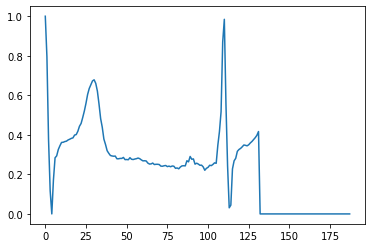

In [6]:
plt.plot(data_no[0,:])

In [8]:
nTrain = 3000
nTest = 1000
x_train = np.concatenate((data_no[:nTrain,:], data_ab[:nTrain,:]),0)
y_train = np.concatenate((np.zeros(nTrain,), np.ones(nTrain,)),0)
x_test = np.concatenate((data_no[nTrain:nTrain+nTest,:], data_ab[nTrain:nTrain+nTest,:]),0)
y_test = np.concatenate((np.zeros(nTest,), np.ones(nTest,)),0)

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
model = Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3,
                        input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3, strides=2))
model.add(layers.Conv1D(filters=32, kernel_size=3,
                        input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3, strides=2))
model.add(layers.LSTM(16))
model.add(layers.Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
38/38 [==============================] - 6s 86ms/step - loss: 0.6262 - accuracy: 0.6558 - val_loss: 0.9336 - val_accuracy: 0.3883
Epoch 2/50
38/38 [==============================] - 3s 70ms/step - loss: 0.5755 - accuracy: 0.7110 - val_loss: 0.8144 - val_accuracy: 0.4400
Epoch 3/50
38/38 [==============================] - 3s 71ms/step - loss: 0.5670 - accuracy: 0.7163 - val_loss: 0.8611 - val_accuracy: 0.4133
Epoch 4/50
38/38 [==============================] - 3s 71ms/step - loss: 0.5492 - accuracy: 0.7252 - val_loss: 0.8660 - val_accuracy: 0.4367
Epoch 5/50
38/38 [==============================] - 3s 72ms/step - loss: 0.5462 - accuracy: 0.7260 - val_loss: 0.7145 - val_accuracy: 0.6025
Epoch 6/50
38/38 [==============================] - 3s 71ms/step - loss: 0.5375 - accuracy: 0.7308 - val_loss: 0.7138 - val_accuracy: 0.5767
Epoch 7/50
38/38 [==============================] - 3s 72ms/step - loss: 0.5437 - accuracy: 0.7300 - val_loss: 0.7663 - val_accuracy: 0.4992
Epoch 8/50
38

In [11]:
o = model.predict(x_test)
o = np.argmax(o,1)
y_test = np.argmax(y_test,1)
sum(np.equal(y_test,o)/len(y_test))

0.95749999999995